# Interpreted Probabilistic Context Free Grammars

## Formal Grammars 

In [135]:
from numpy.random import choice

### Using dictionaries

One simple and intuitive way of implementing a grammar in python is as a dictionary:
- The keys are the left hand side rules 
- The values are lists containing the possible strings that can be substituted by the key

> __NOTE__: To see why we need to use lists as values rather than using a different key for each rule, try to repeat the same key more than once. What happens?

For instance, let's write the grammar with the following rules:
$$
S \rightarrow aS | bS | \epsilon
$$

In [129]:
grammar = {
    'S': [
        'aS', 
        'bS', 
        ''
    ]
}

One thing we can do with this way of defining grammars is writing a function that randomly applies rule until we get to a string consisting only of terminals:

In [134]:
# always start with the starting symbol
current_sentence = 'S'
# while there is a non-terminal in the sentence
while 'S' in current_sentence:
    # substitute the first occurrence of S
    # with a randomly chosen substitution rule
    current_sentence = current_sentence.replace(
        'S', 
        choice((grammar['S'])),
        # NOTE: in this particular case there will always
        # only be one S, but this is not true for 
        # all grammars!
        1
    )
print('String: ', current_sentence)

String:  abaaa


Write a function that takes a grammar, a set of terminals, and a set of nonterminals, and determines where the grammar is in the Chomsky hierarchy (Spend about 20 minutes on this - if you see that you can do it, leave it!):

In [ ]:
# Your function here




### A new piece of python syntax: generators

Before we move onto defining classes to model grammars, which allow richer structures than dictionaries, we need to briefly talk about generators. A generator is basically _a function with a memory_, which can return multiple things in succession. Suppose you have a generator called `gen`. A typical use case is to use it in a construction like `for i in gen():`, where `i` will take on in succession the values returned by the generator.

The definition is almost like a function, except generators have the keyword `yield` where functions have `return`, and the execution doesn't stop at the return but can continue as long as future yield are possible.

The simple example is a generator that first yields (returns) 1 and then 2:

In [136]:
def simple_generator():
    # when getting things out of a generator,
    # the generator will return in the order
    # the yield statements are encountered
    
    # This is encountered first
    yield 1
    # Then this is encountered
    yield 2
    
for i in simple_generator():
    print(i)

1
2


A slightly more complex generator simply counts the odd integers starting with 1:

In [139]:
def odd_counter():
    i = 0
    while True:
        yield i*2+1
        i += 1

In [140]:
for i in odd_counter():
    if i <= 20:
        print(i, end=', ')
    else:
        break

1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 

Note that generators can also call themselves, like functions. Then we get recursive generators:

In [156]:
# Can you figure out what this generator does?
def recursive_gen(current_options, n):
    new_options = []
    for i in current_options:
        if sum(i) == n:
            yield i
        else:
            new_options.append(i+[1])
            new_options.append(i+[2])
    if all([sum(j)>n for j in new_options]):
        return 
    for i in recursive_gen(new_options, n):
        yield i

In [160]:
for i in recursive_gen([[1],[2],[3]], 6):
    print(i)

[2, 2, 2]
[3, 1, 2]
[3, 2, 1]
[1, 1, 2, 2]
[1, 2, 1, 2]
[1, 2, 2, 1]
[2, 1, 1, 2]
[2, 1, 2, 1]
[2, 2, 1, 1]
[3, 1, 1, 1]
[1, 1, 1, 1, 2]
[1, 1, 1, 2, 1]
[1, 1, 2, 1, 1]
[1, 2, 1, 1, 1]
[2, 1, 1, 1, 1]


Try to write the recursive_gen just as a normal function with `return` statements.

In [ ]:
# Your code here!




### Using classes

> __NOTE__: Before you work on the exercise in 'Defining a grammar class' please have a look at the rest of the notebook. This should give you an idea of what you need to do with that class, and therefore how to structure them internally.

#### Defining a grammars class

Write a Grammar class to create context-free grammars. The `__init__` method should take a `start` argument with the starting nonterminal symbol.

The class should also have the following method (i.e., function):
- `add_rule`: add a rule to the grammar. The arguments of `add_rule` are: 
    1. The nonterminal on the left-hand side of the rule
    1. The string on the right side of the rule, containing `%s` wherever a non-terminal appears
    1. A list of non-terminal symbols, one for each `%s`, saying which non-terminals correspond to each %s.

In [ ]:
#### your class definition here!



Once this is defined, you should be able to run the following code to define the grammar for palindrome which we discussed in class:

```python
grammar = Grammar(start='S')

grammar.add_rule('S', 'a%sa', ['S'])
grammar.add_rule('S', 'b%sb', ['S'])
grammar.add_rule('S', '')
```

In [ ]:
#### Define the palindrome grammar here!



#### Finding minimal formulas (more difficult!)

Now add another method `compute_first` to the class above which generates the `n` shortest strings in the language.

You should be able to run for instance (given the palindrome grammar above):

```python
grammar.compute_first(6)
```

Which should print out:

```python
aa
bb
aaaa
abba
baab
bbbb
```

> __HINT__: Think about this as exploring a tree (branches separating whenever more than one rule can be applied), and use the power of recursion to explore the tree. The recursive function can take a 'present' layer (the strings at the current nesting level) and progressively build the next layer by applying every rule to every sentence with nonterminals in the current layer, while yielding the sentences that only contain terminals. Then, yield the results of running the function on the next layer in a loop. 

In [68]:
#### Test compute_first here!

def enumerate_palindromes(layer):
    # your function here


def compute_first(n):
    for i, m in enumerate(enumerate_palindromes(['S'])):
        if i <= n:
            print(m)
        else:
            break

In [67]:
compute_first(4)


aa
bb
aaaa
abba


#### Probabilistic context-free grammar

Expand the Grammar class once more so that `add_rule` takes one more argument: The (unnormalized) probability of applying the rule rather than the other rules with the same left-hand side.

The following code for instance redefines the palindrome grammar above but with probabilities:
```python
grammar = Grammar(start='S')

grammar.add_rule('S', 'a%sa', ['S'], 1)
grammar.add_rule('S', 'b%sb', ['S'], 1)
grammar.add_rule('S', '', 1)
```

In [ ]:
#### your class definition here!



Add a method `generate` to Grammar to generate a random string in the language by iteratively applying the rules according to the defined probabilities. The following code should run (but possibly give a different answer on different runs):

```python
grammar.generate()
```

printing e.g.,
```python
aabbaa
```

In [ ]:
#### Test generate here!



What happens when we increase...

- the probability of the rule $S \rightarrow aSa$?
- the probability of the rule $S \rightarrow bSb$?
- the probability of the rule $S \rightarrow \epsilon$?

## Formal semantics

In [1]:
!pip3 install ColabTurtlePlus

In [2]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
import re
import IPython

Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


In the past few weeks, we have set up a picture where the mind encodes categories and other stuff with a Language of Thought, we have seen how we can formally define languages, and we have explored how they can be interpreted. However, you might not have realized yet how powerful these methods are in what they can express. This week, we'll put it all together and see some case studies: a simple grammar for arithmetic, a grammar of shapes, and a grammar of sounds. 

Let's start by defining a couple of useful functions (can ignore them for now and have a look when you encounter them below):

In [3]:
def normalize(arr):
    # Transform the array so that it sums to 1
    return arr / np.sum(arr)


def apply_rule(match, grammar):
    """
    Accepts both PCFGs (where the keys of grammar
    are lists of tuples (unnormalized prob, right hand side)
    and CFGs (where the keys are lists of right hand side strings.
    """
    match_txt = grammar[match.group(0)]
    try:
        # if PCFG
        probs, subs = zip(*match_txt)
    except ValueError:
        # if CFG
        subs = match_txt
        probs = [1]*len(subs)
    sub = choice(subs, p=normalize(probs))
    return sub

### Basic arithmetic as a CFG

#### A simple grammar

Before we get onto interpreting sentences from the grammar, we need a grammar to produce sentences with. For simplicity, we will encode the language as a dictionary. The keys are the left-hand side of substitution rules, the values a list of possible right-hand sides. 

> __NOTE__ We will put non-terminals between angle brackets, e.g. `'<S>'` to simplify parsing the strings.

Let's construct a very simple grammar:

In [381]:
CFG_arithmetic = {
    '<S>': ['plusOne(<S>)', 'one']
}

We will also need some way of generating random strings from the grammar:

In [4]:
def complete(sentence, grammar):
    # if there are still '<' that means there are still nonterminals
    while '<' in sentence:
        # substitute the first nonterminal applying 
        # one of the rules in the grammar
        sentence = re.sub(
            # Greedy search of an expression between
            # angle brackets.
            '<(.*?)>', 
            lambda match: apply_rule(match, grammar), 
            sentence
        )
    return sentence

So for example let's produce a random string:

In [371]:
complete('<S>', CFG_arithmetic)

'plusOne(plusOne(plusOne(plusOne(one))))'

Note that even though we have a sentence now and we have an _intuitive_ sense of what it could mean, we still need a way of implementing the interpretation in python. So let's do that!

#### Interpreting the grammar

We will use $\lambda$ expressions to encode the meaning of our operators. Thankfully this is made quite easy by Python's lambda syntax, which we have seen a couple of weeks ago. We want to interpret the very simple arithmetic language defined above. We assume a type system with:
- One primitive type $n$, the type of integers.
- Function types defined inductively: $<\alpha, \beta>$ is the set of functions from things of type $\alpha$ to things of type $\beta$.

We can give meanings to all the terminals in our language. We do this in a dictionary: the keys are the terminals of our grammar and the values are the meanings, written as $\lambda$ expressions:

In [359]:
meanings = {
    # type n
    'one': 1,
    # type <n,n>
    'plusOne': lambda x: x+1
}

Our primitives can be applied to each other in a way consistent with their types:

In [360]:
# n to n
meanings['plusOne'](
    # n to n
    meanings['plusOne'](
        # n
        meanings['one']
    )
)

3

If the primitives in the language are defined, we can also write a string in the language as a python string, e.g., `'plusOne(one)'`. This is useful when e.g. building random strings from the language. However, we need a way to go from the string to the _interpreted_ string. For this, we exploit python's own interpreter via the keyword `eval`. Python's `eval` function plays the role of the interpretation function which we discussed in class, but it allows us to not take care of parsing brackets (going from a string to the underlying parse tree to interpret).

> __NOTE__ It is generally not recommended to use Python's `eval`. We will use it here only to evaluate sentences in our hand-made grammars, but never let it evaluate something you don't understand! We can pass `meanings` as the second argument of `eval` to tell it which symbols to interpret.

Let's see a simple example:

In [369]:
eval('plusOne(plusOne(one))', meanings)

3

Now we have a way of generating random strings from our gramnmar, as well as interpreting them. Therefore, we can study what happens when we produce a bunch of random strings. For instance, we can ask: what's the distribution of numbers produced by our PCFG?

In [335]:
# plot distribution of numbers obtained with this grammar
numbers = [
    eval(complete('<S>', CFG_arithmetic), meanings) 
    for _ in range(10000)
]

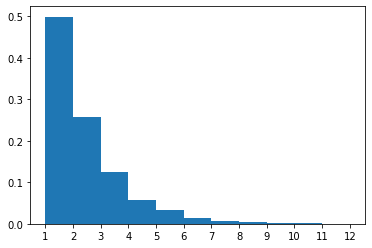

In [336]:
plt.hist(numbers, density=True, bins=np.arange(1,13))
plt.xticks(np.arange(1, 13))
plt.show()

Turns out the probability of each number $n$ is $2^{-n}$. Can you tell why?

#### From a CFG to a PCFG

In practice, we'll mostly work with _probabilistic_ context free grammars. The idea here is that for each nonterminal we specify the probability of each possible substitution. A natural way of doing this here is, instead of having simply a list of possible substitutions as the value of the grammar dictionary, we have a list of tuples. The first element of each tuple is the (unnormalized) probability of that substitution rule, the second element is the actual right-hand side. 

Applying this to our simple arithmetic grammar above:

In [412]:
CFG_arithmetic = {
    '<S>': [
        (1, 'plusOne(<S>)'), 
        (1, 'one')
    ]
}

Our function `complete` still works, but now applies substitution rules with the given probabilities:

In [396]:
complete('<S>', CFG_arithmetic)

'plusOne(plusOne(plusOne(plusOne(one))))'

#### Expanding the grammar

Our simple arithmetical grammar is cool and all, but extremely small. Let's enrich it slightly:

In [436]:
CFG_arithmetic = {
    '<S>': [
        (1, 'plusOne(<S>)'), 
        (1, 'one'),
        # NEW!
        (0.3, 'plus(<S>)(<S>)'),
        (0.3, 'minus(<S>)(<S>)')
    ]
}

In [437]:
CFG_arithmetic

{'<S>': [(1, 'plusOne(<S>)'),
  (1, 'one'),
  (0.3, 'plus(<S>)(<S>)'),
  (0.3, 'minus(<S>)(<S>)')]}

We also need to add the meaning of the new terminals:

In [442]:
# type <n,<n,n>>
meanings['plus'] = lambda x: lambda y: x + y
# type <n,<n,n>>
meanings['minus'] = lambda x: lambda y: x - y

Make sure that we can interpret the strings produces by the expanded grammar:

In [434]:
eval('plus(plusOne(plusOne(one)))(plusOne(one))', meanings)

5

Let's produce a bunch of sentences in the new grammar and see what distribution their interpretation takes:

In [438]:
# plot distribution of numbers obtained with this grammar
numbers = [
    eval(complete('<S>', CFG_arithmetic), meanings) 
    for _ in range(10000)
]

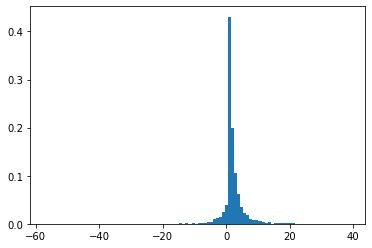

In [441]:
plt.hist(numbers, density=True, bins=100)
plt.show()